In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

In [2]:
import tensorflow

In [7]:
# Define U-Net architecture
def unet(input_size=(224, 224, 3)):
    inputs = tf.keras.Input(input_size)
    
    # Encoder
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(inputs)
    conv1 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv1)
    pool1 = layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool1)
    conv2 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv2)
    pool2 = layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool2)
    conv3 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv3)
    pool3 = layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool3)
    conv4 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv4)
    drop4 = layers.Dropout(0.5)(conv4)
    pool4 = layers.MaxPooling2D(pool_size=(2, 2))(drop4)
    
    # Bridge
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(pool4)
    conv5 = layers.Conv2D(1024, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv5)
    drop5 = layers.Dropout(0.5)(conv5)
    
    # Decoder
    up6 = layers.Conv2DTranspose(512, 2, strides=(2, 2), padding='same')(drop5)
    merge6 = layers.concatenate([drop4, up6], axis=3)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge6)
    conv6 = layers.Conv2D(512, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv6)
    
    up7 = layers.Conv2DTranspose(256, 2, strides=(2, 2), padding='same')(conv6)
    merge7 = layers.concatenate([conv3, up7], axis=3)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge7)
    conv7 = layers.Conv2D(256, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv7)
    
    up8 = layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv7)
    merge8 = layers.concatenate([conv2, up8], axis=3)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge8)
    conv8 = layers.Conv2D(128, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv8)
    
    up9 = layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv8)
    merge9 = layers.concatenate([conv1, up9], axis=3)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(merge9)
    conv9 = layers.Conv2D(64, 3, activation='relu', padding='same', kernel_initializer='he_normal')(conv9)
    
    outputs = layers.Conv2D(1, 1, activation='sigmoid')(conv9)
    
    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Load data
def load_data(data_dir):
    # Load images
    image_filenames = sorted(os.listdir(os.path.join(data_dir, 'images')))
    images = [img_to_array(load_img(os.path.join(data_dir, 'images', filename))) for filename in image_filenames]
    images = np.array(images)
    
    # Load masks
    mask_filenames = sorted(os.listdir(os.path.join(data_dir, 'masks')))
    masks = [img_to_array(load_img(os.path.join(data_dir, 'masks', filename), color_mode='grayscale')) for filename in mask_filenames]
    masks = np.array(masks) / 255.0
    
    return images, masks

In [8]:
# Define paths
data_dir = 'C:/Users/Sinan/Desktop/fma/U-net/CXR with masks dataset'

images, masks = load_data(data_dir)

# Split data into train and test sets
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.2, random_state=42)

In [12]:
train_images, valid_images, train_masks, valid_masks = train_test_split(train_images, train_masks, test_size=0.25, random_state=42)

In [9]:
# Build and compile the model
model = unet()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_masks, batch_size=8, epochs=10, validation_data=(test_images, test_masks))

# Evaluate the model
loss, accuracy = model.evaluate(test_images, test_masks)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 181s 12s/step - accuracy: 0.5994 - loss: 61.7155 - val_accuracy: 0.6983 - val_loss: 1.3838
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 174s 12s/step - accuracy: 0.6237 - loss: 1.2721 - val_accuracy: 0.7234 - val_loss: 1.6016
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 170s 11s/step - accuracy: 0.6616 - loss: 1.2641 - val_accuracy: 0.7335 - val_loss: 0.5844
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 171s 11s/step - accuracy: 0.6492 - loss: 0.7835 - val_accuracy: 0.7619 - val_loss: 0.5294
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 168s 11s/step - accuracy: 0.6933 - loss: 0.7499 - val_accuracy: 0.5061 - val_loss: 0.6475
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 168s 11s/step - accuracy: 0.6972 - loss: 0.5391 - val_accuracy: 0.6569 - val_loss: 0.5349
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step - accuracy: 0.7355 - loss: 0.4889 - val_accuracy: 0.8161 - val_loss: 0.4185
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 169s 11s/step - accuracy: 0.8095 - loss: 0.4025 - val_accuracy: 0

In [13]:
loss, accuracy = model.evaluate(valid_images, valid_masks)
print(f'Valid Loss: {loss}, Valid Accuracy: {accuracy}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.8526 - loss: 0.3247
Valid Loss: 0.3247494399547577, Valid Accuracy: 0.8526387810707092


1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


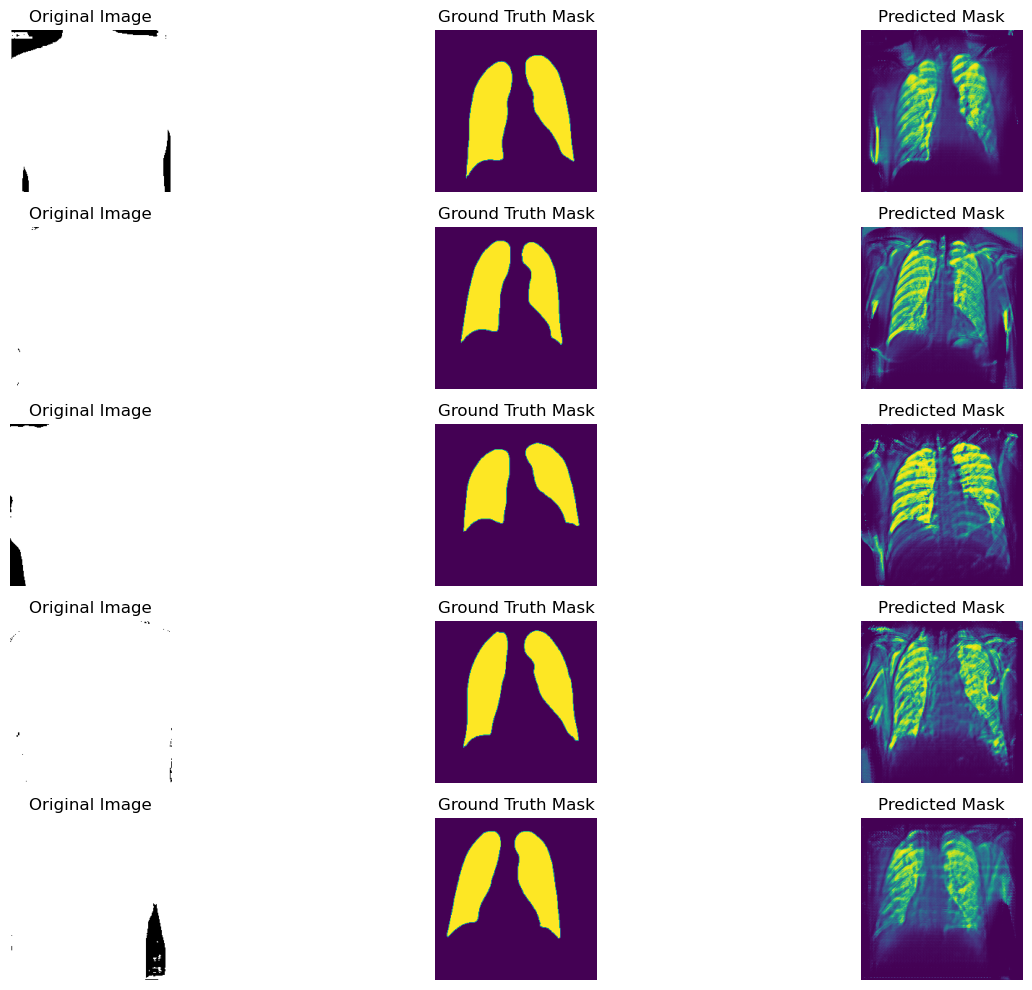

In [18]:
import matplotlib.pyplot as plt

# Predict masks for test images
predicted_masks = model.predict(valid_images)

# Plot a few test images along with their predicted masks
n = 5  # Number of images to plot
plt.figure(figsize=(15, 10))
for i in range(n):
    # Plot original image
    plt.subplot(n, 3, i*3 + 1)
    plt.imshow(valid_images[i])
    plt.title('Original Image')
    plt.axis('off')
    
    # Plot ground truth mask
    plt.subplot(n, 3, i*3 + 2)
    plt.imshow(valid_masks[i].squeeze())
    plt.title('Ground Truth Mask')
    plt.axis('off')
    
    # Plot predicted mask
    plt.subplot(n, 3, i*3 + 3)
    plt.imshow(predicted_masks[i].squeeze())
    plt.title('Predicted Mask')
    plt.axis('off')

plt.tight_layout()
plt.show()